In [14]:
from algorithms.initialization.KMeansPlusPlus import KMeansPlusPlus
from utilities.Preprocessor import Preprocessor
from utilities.Utilities import Utilities
from algorithms.KMeans import KMeans

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

import numpy as np

In [15]:
### Load and Preprocess Data ###
pp = Preprocessor()

column_names = ["patient_id", "clump_thickness", "size_uniformity", "shape_uniformity", "marginal_adhesion", "epithelial_size", "bare_nuclei", "bland_chromatin", "normal_nucleoli", "mitosis", "class"]

# Load the data
pp.load_data("./data/breast-cancer-wisconsin.data", column_names=column_names, response_name="class", na_values=["?"], converters={"class": lambda value: 0 if int(value) == 2 else 1})

# Remove the patient_id column which contribute no valuable information
pp.drop_columns("patient_id")

# Remove any rows with missing samples
pp.drop_na()

# Standard normalize the data
pp.normalize()

pp.response

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: class, Length: 683, dtype: int64

In [16]:
### Reduce the Dimensionality of the Data Using PCA ###

# PCA transform the data, targeting two dimensions
pca_transformer = PCA(n_components=2)
transformed_data = pca_transformer.fit_transform(pp.data)

In [17]:
# Verify that Two Clusters is Ideal

num_clusters = 2

0.47493607660753606


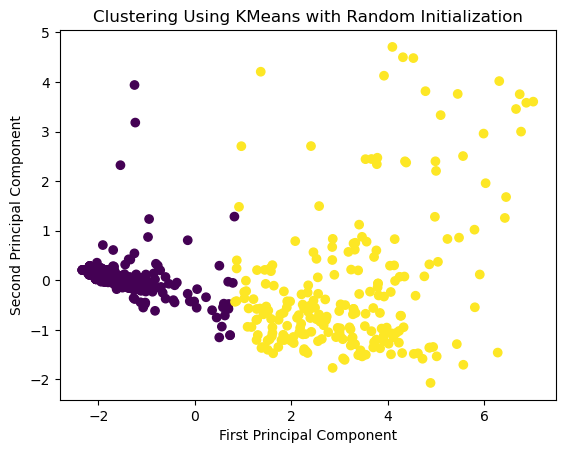

In [30]:
### Fit the KMeans Algorithm ###

# Create and apply KMeans transformer
kmeans_transformer = KMeans(num_clusters, 0.001)
kmeans_transformer.fit(np.array(transformed_data))

# Compute F1 score
kmeans_f1_score = Utilities.f_score(pp.response.to_numpy(), kmeans_transformer.cluster_assignment)

print(kmeans_f1_score)

# Plot the clustering
plt.scatter(transformed_data[:,0], transformed_data[:,1], c=kmeans_transformer.cluster_assignment)
plt.title("Clustering Using KMeans with Random Initialization")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

0.4781883892095107


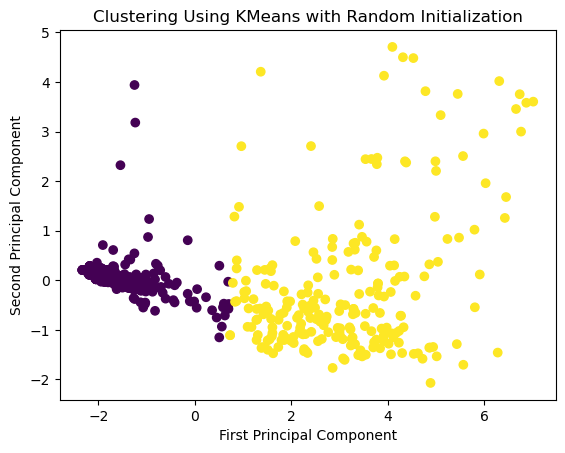

In [36]:
### Fit the KMeans++ Algorithm ###

# Create and apply KMeans++ transformer
kmeanspp_transformer = KMeans(num_clusters, 0.001, initialization_method=KMeansPlusPlus)
kmeanspp_transformer.fit(np.array(transformed_data))

# Compute F1 score
kmeans_f1_score = Utilities.f_score(pp.response.to_numpy(), kmeanspp_transformer.cluster_assignment)

print(kmeans_f1_score)

# Plot the clustering
plt.scatter(transformed_data[:,0], transformed_data[:,1], c=kmeanspp_transformer.cluster_assignment)
plt.title("Clustering Using KMeans with KMeans Plus Plus Initialization")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()